In [0]:
# https://www.datacamp.com/courses/cleaning-data-in-python

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import glob
import re

## 1. Exploring your data

#### Diagnose data for cleaning

In [0]:
# Import pandas
import pandas as pd

In [0]:
# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

In [0]:
# Print the head of df
print(df.head())

       Job #  ...              DOBRunDate
0  121577873  ...  04/26/2013 12:00:00 AM
1  520129502  ...  04/26/2013 12:00:00 AM
2  121601560  ...  04/26/2013 12:00:00 AM
3  121601203  ...  04/26/2013 12:00:00 AM
4  121601338  ...  04/26/2013 12:00:00 AM

[5 rows x 82 columns]


In [0]:
# Print the tail of df
print(df.tail())

          Job #  ...              DOBRunDate
1320  121604264  ...  05/01/2013 12:00:00 AM
1321  420840594  ...  05/01/2013 12:00:00 AM
1322  121604326  ...  05/01/2013 12:00:00 AM
1323  121604317  ...  05/01/2013 12:00:00 AM
1324  121605548  ...                     NaN

[5 rows x 82 columns]


In [0]:
# Print the shape of df
print(df.shape)

(1325, 82)


In [0]:
# Print the columns of df
print(df.columns)

Index(['Job #', 'Doc #', 'Borough', 'House #', 'Street Name', 'Block', 'Lot',
       'Bin #', 'Job Type', 'Job Status', 'Job Status Descrp',
       'Latest Action Date', 'Building Type', 'Community - Board', 'Cluster',
       'Landmarked', 'Adult Estab', 'Loft Board', 'City Owned', 'Little e',
       'PC Filed', 'eFiling Filed', 'Plumbing', 'Mechanical', 'Boiler',
       'Fuel Burning', 'Fuel Storage', 'Standpipe', 'Sprinkler', 'Fire Alarm',
       'Equipment', 'Fire Suppression', 'Curb Cut', 'Other',
       'Other Description', 'Applicant's First Name', 'Applicant's Last Name',
       'Applicant Professional Title', 'Applicant License #',
       'Professional Cert', 'Pre- Filing Date', 'Paid', 'Fully Paid',
       'Assigned', 'Approved', 'Fully Permitted', 'Initial Cost',
       'Total Est. Fee', 'Fee Status', 'Existing Zoning Sqft',
       'Proposed Zoning Sqft', 'Horizontal Enlrgmt', 'Vertical Enlrgmt',
       'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
  

In [0]:
subset_cols = ['Job #', 'Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee', 'Existing Zoning Sqft', 'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage', 'ExistingNo. of Stories',
       'Proposed No. of Stories', 'Existing Height', 'Proposed Height']
df_subset = df[subset_cols]
df_subset.shape # 13 columns

(1325, 13)

In [0]:
# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())

       Job #  Doc #  ... Existing Height Proposed Height
0  121577873      2  ...               0               0
1  520129502      1  ...               0               0
2  121601560      1  ...              54              54
3  121601203      1  ...             120             120
4  121601338      1  ...              64              64

[5 rows x 13 columns]
          Job #  Doc #  ... Existing Height Proposed Height
1320  121604264      3  ...               0               0
1321  420840594      1  ...               0              10
1322  121604326      1  ...              60              60
1323  121604317      1  ...              60              60
1324  121605548      1  ...              60              60

[5 rows x 13 columns]


In [0]:
# Print the head and tail of df_subset
print(df_subset.head())
print(df_subset.tail())


       Job #  Doc #  ... Existing Height Proposed Height
0  121577873      2  ...               0               0
1  520129502      1  ...               0               0
2  121601560      1  ...              54              54
3  121601203      1  ...             120             120
4  121601338      1  ...              64              64

[5 rows x 13 columns]
          Job #  Doc #  ... Existing Height Proposed Height
1320  121604264      3  ...               0               0
1321  420840594      1  ...               0              10
1322  121604326      1  ...              60              60
1323  121604317      1  ...              60              60
1324  121605548      1  ...              60              60

[5 rows x 13 columns]


In [0]:
# Print the info of df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 82 columns):
Job #                           1325 non-null int64
Doc #                           1325 non-null int64
Borough                         1325 non-null object
House #                         1325 non-null object
Street Name                     1325 non-null object
Block                           1325 non-null int64
Lot                             1325 non-null int64
Bin #                           1325 non-null int64
Job Type                        1325 non-null object
Job Status                      1325 non-null object
Job Status Descrp               1325 non-null object
Latest Action Date              1325 non-null object
Building Type                   1325 non-null object
Community - Board               1325 non-null object
Cluster                         0 non-null float64
Landmarked                      203 non-null object
Adult Estab                     0 non-null float64
Lo

In [0]:
# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325 entries, 0 to 1324
Data columns (total 13 columns):
Job #                      1325 non-null int64
Doc #                      1325 non-null int64
Borough                    1325 non-null object
Initial Cost               1325 non-null object
Total Est. Fee             1325 non-null object
Existing Zoning Sqft       1325 non-null int64
Proposed Zoning Sqft       1325 non-null int64
Enlargement SQ Footage     1325 non-null int64
Street Frontage            1325 non-null int64
ExistingNo. of Stories     1325 non-null int64
Proposed No. of Stories    1325 non-null int64
Existing Height            1325 non-null int64
Proposed Height            1325 non-null int64
dtypes: int64(10), object(3)
memory usage: 134.6+ KB
None


#### Exploratory data analysis

In [0]:
df_subset.describe()

,Job #,Doc #,Existing Zoning Sqft,Proposed Zoning Sqft,Enlargement SQ Footage,Street Frontage,ExistingNo. of Stories,Proposed No. of Stories,Existing Height,Proposed Height
count,1.325000e+03,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000,1325.000000
mean,2.427763e+08,1.169811,661.243774,850.161509,76.978868,3.311698,7.884528,7.944906,90.311698,90.876226
std,1.301508e+08,0.505851,8943.419683,9211.703060,1485.149937,32.628855,11.377528,11.362570,133.733875,133.534871
min,1.036439e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.216018e+08,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,20.000000,21.000000
50%,2.202862e+08,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,42.000000,42.000000
75%,3.207576e+08,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,110.000000,110.000000
max,5.400221e+08,5.000000,291894.000000,291894.000000,50384.000000,777.000000,102.000000,102.000000,1250.000000,1250.000000


In [0]:
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

MANHATTAN        647
BROOKLYN         314
QUEENS           216
BRONX             93
STATEN ISLAND     55
Name: Borough, dtype: int64


In [0]:
# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

NY     1296
NJ       13
PA        6
CA        3
UT        2
FL        1
IL        1
TX        1
GA        1
NaN       1
Name: State, dtype: int64


In [0]:
# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

NOT APPLICABLE                              823
NaN                                         418
ON-SITE                                      39
OFF-SITE                                     32
USE UNDER 300 CU.YD                          13
Name: Site Fill, dtype: int64


#### Visual exploratory data analysis

In [0]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

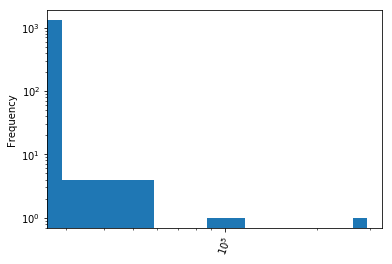

In [0]:
# Plot the histogram
df['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

In [0]:
df['Initial Cost'].head(5)

0    $75000.00
1        $0.00
2    $30000.00
3     $1500.00
4    $19500.00
Name: Initial Cost, dtype: object

**NOTE: convert object to float**

In [0]:
def format_amount(x):
    x = x[1:].split('.')[0]
    return int(''.join(x.split('$')))

In [0]:
# convert variable from object to float
df['initial_cost'] = df['Initial Cost'].apply(format_amount)

In [0]:
df['initial_cost'].head(5)

0    75000
1        0
2    30000
3     1500
4    19500
Name: initial_cost, dtype: int64

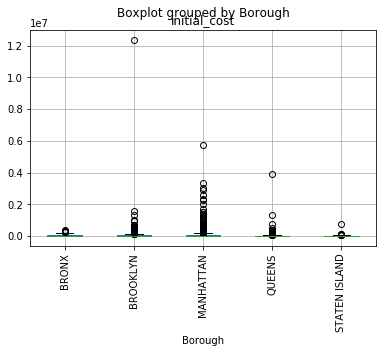

In [0]:
# Create the boxplot
df.boxplot(column='initial_cost', by='Borough', rot=90)

# Display the plot
plt.show()

In [0]:
# Create and display the first scatter plot
df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

# Create and display the second scatter plot
df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
plt.show()

## 2.  Tidying data for analysis

#### Tidy data

In [0]:
airquality = pd.read_csv('airquality.csv')
airquality.shape # airquality

(153, 6)

In [0]:
# Print the head of airquality
print(airquality.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


In [0]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'])

In [0]:
# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day variable  value
0      5    1    Ozone   41.0
1      5    2    Ozone   36.0
2      5    3    Ozone   12.0
3      5    4    Ozone   18.0
4      5    5    Ozone    NaN


In [0]:
airquality_melt.shape

(612, 4)

In [0]:
# Melt airquality: airquality_melt
airquality_melt = pd.melt(frame=airquality, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')

In [0]:
# Print the head of airquality_melt
print(airquality_melt.head())

   Month  Day measurement  reading
0      5    1       Ozone     41.0
1      5    2       Ozone     36.0
2      5    3       Ozone     12.0
3      5    4       Ozone     18.0
4      5    5       Ozone      NaN


#### Pivoting data

In [0]:
# Pivot airquality_melt: airquality_pivot
airquality_pivot = airquality_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')

In [0]:
# Print the head of airquality_pivot
print(airquality_pivot.head())

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3


In [0]:
# Print the index of airquality_pivot
print(airquality_pivot.index)

MultiIndex(levels=[[5, 6, 7, 8, 9], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9

In [0]:
# Reset the index of airquality_pivot: airquality_pivot_reset
airquality_pivot_reset = airquality_pivot.reset_index()

In [0]:
# Print the new index of airquality_pivot_reset
print(airquality_pivot_reset.index)

RangeIndex(start=0, stop=153, step=1)


In [0]:
# Print the head of airquality_pivot_reset
print(airquality_pivot_reset.head())

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3


**Pivoting duplicate values**

Let's say your data collection method accidentally duplicated your dataset. Such a dataset, in which each row is duplicated, has been pre-loaded as airquality_dup.

In [0]:
airquality_melt.shape

(612, 4)

In [0]:
airquality_dup = pd.concat([airquality_melt]*2, ignore_index=True)
airquality_dup.shape # airquality_dup

(1224, 4)

In [0]:
# Pivot airquality_dup: airquality_pivot
airquality_pivot = airquality_dup.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading', aggfunc=np.mean)

In [0]:
# Reset the index of airquality_pivot
airquality_pivot = airquality_pivot.reset_index()

In [0]:
# Print the head of airquality_pivot
print(airquality_pivot.head())

measurement  Month  Day  Ozone  Solar.R  Temp  Wind
0                5    1   41.0    190.0  67.0   7.4
1                5    2   36.0    118.0  72.0   8.0
2                5    3   12.0    149.0  74.0  12.6
3                5    4   18.0    313.0  62.0  11.5
4                5    5    NaN      NaN  56.0  14.3


In [0]:
# Print the head of airquality
print(airquality.head())

   Ozone  Solar.R  Wind  Temp  Month  Day
0   41.0    190.0   7.4    67      5    1
1   36.0    118.0   8.0    72      5    2
2   12.0    149.0  12.6    74      5    3
3   18.0    313.0  11.5    62      5    4
4    NaN      NaN  14.3    56      5    5


#### Beyond melt and pivot

**Splitting a column with .str**

In [0]:
tb = pd.read_csv('tb.csv')
tb.shape # (201, 18)

(201, 18)

In [0]:
tb.head(5)

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014,f1524,f2534,f3544,f4554,f5564,f65,fu
0,AD,2000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5.0,12.0,10.0,NaN,3.0,16.0,1.0,3.0,0.0,0.0,4.0,NaN
2,AF,2000,52.0,228.0,183.0,149.0,129.0,94.0,80.0,NaN,93.0,414.0,565.0,339.0,205.0,99.0,36.0,NaN
3,AG,2000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN
4,AL,2000,2.0,19.0,21.0,14.0,24.0,19.0,16.0,NaN,3.0,11.0,10.0,8.0,8.0,5.0,11.0,NaN


In [0]:
# Melt tb: tb_melt
tb_melt = pd.melt(tb, id_vars=['country', 'year'])

In [0]:
tb_melt.head(5)

,country,year,variable,value
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


In [0]:
# Create the 'gender' column
tb_melt['gender'] = tb_melt.variable.str[0]

In [0]:
# Create the 'age_group' column
tb_melt['age_group'] = tb_melt.variable.str[1:]

In [0]:
# Print the head of tb_melt
print(tb_melt.head())

  country  year variable  value gender age_group
0      AD  2000     m014    0.0      m       014
1      AE  2000     m014    2.0      m       014
2      AF  2000     m014   52.0      m       014
3      AG  2000     m014    0.0      m       014
4      AL  2000     m014    2.0      m       014


**Splitting a column with .split() and .get()**

In [0]:
ebola = pd.read_csv('ebola.csv')
ebola.head(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [0]:
ebola.shape # (122, 18)

(122, 18)

In [0]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [0]:
# Melt ebola: ebola_melt
ebola_melt = pd.melt(ebola, id_vars=['Date', 'Day'], var_name='type_country', value_name='counts')

In [0]:
# Create the 'str_split' column
ebola_melt['str_split'] = ebola_melt.type_country.str.split('_')

In [0]:
# Create the 'type' column
ebola_melt['type'] = ebola_melt.str_split.str.get(0)

In [0]:
# Create the 'country' column
ebola_melt['country'] = ebola_melt.str_split.str.get(1)

In [0]:
# Print the head of ebola_melt
print(ebola_melt.head())

         Date  Day  type_country  counts        str_split   type country
0    1/5/2015  289  Cases_Guinea  2776.0  [Cases, Guinea]  Cases  Guinea
1    1/4/2015  288  Cases_Guinea  2775.0  [Cases, Guinea]  Cases  Guinea
2    1/3/2015  287  Cases_Guinea  2769.0  [Cases, Guinea]  Cases  Guinea
3    1/2/2015  286  Cases_Guinea     NaN  [Cases, Guinea]  Cases  Guinea
4  12/31/2014  284  Cases_Guinea  2730.0  [Cases, Guinea]  Cases  Guinea


## 3. Combining data for analysis

#### Concatenating data

In [0]:
uber = pd.read_csv('nyc_uber_2014.csv', index_col=0)
uber.head(5)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [0]:
uber.shape

(297, 5)

In [0]:
# match data
uber1 = uber[:99]
uber1.shape (99, 4)

(99, 4)

In [0]:
uber1.tail(2)

,Date/Time,Lat,Lon,Base
97,4/1/2014 6:57:00,40.7726,-73.9532,B02512
98,4/1/2014 6:59:00,40.7898,-73.9661,B02512


In [0]:
# match data
uber2 = uber[99:198]
uber2.shape

(99, 4)

In [0]:
uber2.head(2)

,Date/Time,Lat,Lon,Base
0,5/1/2014 0:02:00,40.7521,-73.9914,B02512
1,5/1/2014 0:06:00,40.6965,-73.9715,B02512


In [0]:
# match data
uber3 = uber[198:]
uber2.shape

(98, 4)

In [0]:
uber3.head(2)

,Date/Time,Lat,Lon,Base
0,6/1/2014 0:00:00,40.7293,-73.9920,B02512
1,6/1/2014 0:01:00,40.7131,-74.0097,B02512


**Combining rows of data**

The dataset you'll be working with here relates to NYC Uber data. The original dataset has all the originating Uber pickup locations by time and latitude and longitude. For didactic purposes, you'll be working with a very small portion of the actual data.

Three DataFrames have been pre-loaded: uber1, which contains data for April 2014, uber2, which contains data for May 2014, and uber3, which contains data for June 2014. Your job in this exercise is to concatenate these DataFrames together such that the resulting DataFrame has the data for all three months.

In [0]:
# Concatenate uber1, uber2, and uber3: row_concat
row_concat = pd.concat([uber1, uber2,uber3])

In [0]:
# Print the shape of row_concat
print(row_concat.shape)

(297, 4)


In [0]:
# Print the head of row_concat
print(row_concat.head())

          Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512


**Combining columns of data**

In [0]:
ebola_melt.shape

(1952, 7)

In [0]:
ebola_melt.head(5)

,Date,Day,type_country,counts,str_split,type,country
0,1/5/2015,289,Cases_Guinea,2776.0,"[Cases, Guinea]",Cases,Guinea
1,1/4/2015,288,Cases_Guinea,2775.0,"[Cases, Guinea]",Cases,Guinea
2,1/3/2015,287,Cases_Guinea,2769.0,"[Cases, Guinea]",Cases,Guinea
3,1/2/2015,286,Cases_Guinea,NaN,"[Cases, Guinea]",Cases,Guinea
4,12/31/2014,284,Cases_Guinea,2730.0,"[Cases, Guinea]",Cases,Guinea


In [0]:
status_country = ebola_melt[['type', 'country']]
status_country.columns = ['status', 'country']
status_country.shape

(1952, 2)

In [0]:
# match data
ebola_melt = ebola_melt[['Date', 'Day', 'type_country', 'counts']]
ebola_melt.columns = ['Date', 'Day', 'status_country', 'counts']
ebola_melt.shape

(1952, 4)

In [0]:
ebola_melt.head(5)

,Date,Day,status_country,counts
0,1/5/2015,289,Cases_Guinea,2776.0
1,1/4/2015,288,Cases_Guinea,2775.0
2,1/3/2015,287,Cases_Guinea,2769.0
3,1/2/2015,286,Cases_Guinea,NaN
4,12/31/2014,284,Cases_Guinea,2730.0


In [0]:
# Concatenate ebola_melt and status_country column-wise: ebola_tidy
ebola_tidy = pd.concat([ebola_melt,status_country],axis=1)

In [0]:
# Print the shape of ebola_tidy
print(ebola_tidy.shape)

(1952, 6)


In [0]:
# Print the head of ebola_tidy
print(ebola_tidy.head())

         Date  Day status_country  counts status country
0    1/5/2015  289   Cases_Guinea  2776.0  Cases  Guinea
1    1/4/2015  288   Cases_Guinea  2775.0  Cases  Guinea
2    1/3/2015  287   Cases_Guinea  2769.0  Cases  Guinea
3    1/2/2015  286   Cases_Guinea     NaN  Cases  Guinea
4  12/31/2014  284   Cases_Guinea  2730.0  Cases  Guinea


#### Finding and concatenating data

**Finding files that match a pattern**

As Dan showed you in the video, the glob module has a function called glob that takes a pattern and returns a list of the files in the working directory that match that pattern.

In [0]:
# Import necessary modules
import glob
import pandas as pd

In [0]:
# Write the pattern: pattern
pattern = '*.csv'

In [0]:
# Save all file matches: csv_files
csv_files = glob.glob(pattern)

In [0]:
# Print the file names
print(csv_files)

['ebola.csv', 'weather_data_austin_2010.csv', 'jan.csv', 'airquality.csv', 'titanic.csv', 'auto-mpg.csv', 'gapminder.csv', 'tb.csv', 'tips.csv', 'airport_new.csv', 'march.csv', 'percent-bachelors-degrees-women-usa.csv', 'austin_airport.csv', 'nyc_uber_2014.csv', 'census.csv', 'sizes.csv']


In [0]:
# Load the second file into a DataFrame: csv2
csv2 = pd.read_csv(csv_files[1])

In [0]:
# Print the head of csv2
print(csv2.head())

   Temperature  DewPoint  Pressure            Date
0         46.2      37.5       1.0  20100101 00:00
1         44.6      37.1       1.0  20100101 01:00
2         44.1      36.9       1.0  20100101 02:00
3         43.8      36.9       1.0  20100101 03:00
4         43.5      36.8       1.0  20100101 04:00


**Iterating and concatenating all matches**

Now that you have a list of filenames to load, you can load all the files into a list of DataFrames that can then be concatenated.

In [0]:
# Create an empty list: frames
frames = []

In [0]:
#  Iterate over csv_files
for csv in csv_files:

    #  Read csv into a DataFrame: df
    df = pd.read_csv(csv)
    
    # Append df to frames
    frames.append(df)

In [0]:
# Concatenate frames into a single DataFrame: uber
uber = pd.concat(frames)
# make sure these files belong to the same dataframe

In [0]:
# Print the shape of uber
print(uber.shape)

#### Merge data

**1-to-1 data merge**

Merging data allows you to combine disparate datasets into a single dataset to do more complex analysis.

In [0]:
site = np.array([['DR-1', -49.85, -128.57],
       ['DR-3', -47.15, -126.72],
       ['MSK-4', -48.87, -123.4]], dtype=object)
site

array([['DR-1', -49.85, -128.57],
       ['DR-3', -47.15, -126.72],
       ['MSK-4', -48.87, -123.4]], dtype=object)

In [0]:
# match data
site = pd.DataFrame(site, columns = ['name', 'lat', 'long'] )
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.4


In [0]:
visited = np.array([[619, 'DR-1', '1927-02-08'],
       [734, 'DR-3', '1939-01-07'],
       [837, 'MSK-4', '1932-01-14']], dtype=object)
visited

array([[619, 'DR-1', '1927-02-08'],
       [734, 'DR-3', '1939-01-07'],
       [837, 'MSK-4', '1932-01-14']], dtype=object)

In [0]:
visited = pd.DataFrame(visited, columns = ['ident', 'site', 'dated'])
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,734,DR-3,1939-01-07
2,837,MSK-4,1932-01-14


In [0]:
# Merge the DataFrames: o2o
o2o = pd.merge(left=site, right=visited , left_on='name', right_on='site' )

In [0]:
# Print o2o
print(o2o)

    name    lat    long ident   site       dated
0   DR-1 -49.85 -128.57   619   DR-1  1927-02-08
1   DR-3 -47.15 -126.72   734   DR-3  1939-01-07
2  MSK-4 -48.87  -123.4   837  MSK-4  1932-01-14


**Many-to-1 data merge**



*   Merge the site and visited DataFrames on the 'name' column of site and 'site' column of visited, exactly as you did in the previous exercise.
*   Print the merged DataFrame​.



In [0]:
visited_new = np.array([[619, 'DR-1', '1927-02-08'],
       [622, 'DR-1', '1927-02-10'],
       [734, 'DR-3', '1939-01-07'],
       [735, 'DR-3', '1930-01-12'],
       [751, 'DR-3', '1930-02-26'],
       [752, 'DR-3', float('NaN')],
       [837, 'MSK-4', '1932-01-14'],
       [844, 'DR-1', '1932-03-22']], dtype=object)

In [0]:
visited = pd.DataFrame(visited_new, columns = ['ident', 'site', 'dated'])
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [0]:
site

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.4


In [0]:
# Merge the DataFrames: m2o
m2o = pd.merge(left=site, right=visited , left_on='name', right_on='site')

In [0]:
# Print 
print(m2o)

    name    lat    long ident   site       dated
0   DR-1 -49.85 -128.57   619   DR-1  1927-02-08
1   DR-1 -49.85 -128.57   622   DR-1  1927-02-10
2   DR-1 -49.85 -128.57   844   DR-1  1932-03-22
3   DR-3 -47.15 -126.72   734   DR-3  1939-01-07
4   DR-3 -47.15 -126.72   735   DR-3  1930-01-12
5   DR-3 -47.15 -126.72   751   DR-3  1930-02-26
6   DR-3 -47.15 -126.72   752   DR-3         NaN
7  MSK-4 -48.87  -123.4   837  MSK-4  1932-01-14


**Many-to-many data merge**

Two example DataFrames that share common key values have been pre-loaded: df1 and df2. Another DataFrame df3, which is the result of df1 merged with df2, has been pre-loaded. All three DataFrames have been printed - look at the output and notice how pairwise combinations have been created. This example is to help you develop your intuition for many-to-many merges.

In [0]:
one = np.array([['a', 1],
       ['a', 2],
       ['b', 3],
       ['b', 4]], dtype=object)
df1 = pd.DataFrame(one, columns = ['c1', 'c2'])
df1

,c1,c2
0,a,1
1,a,2
2,b,3
3,b,4


In [0]:
two = np.array([['a', 10],
       ['a', 20],
       ['b', 30],
       ['b', 40]], dtype=object)
df2 = pd.DataFrame(two, columns = ['c1', 'c2'])
df2

,c1,c2
0,a,10
1,a,20
2,b,30
3,b,40


In [0]:
three = np.array([['a', 1, 10],
       ['a', 1, 20],
       ['a', 2, 10],
       ['a', 2, 20],
       ['b', 3, 30],
       ['b', 3, 40],
       ['b', 4, 30],
       ['b', 4, 40]], dtype=object)
df3 = pd.DataFrame(three, columns = ['c1', 'c2_x', 'c2_y'])
df3

,c1,c2_x,c2_y
0,a,1,10
1,a,1,20
2,a,2,10
3,a,2,20
4,b,3,30
5,b,3,40
6,b,4,30
7,b,4,40


In [0]:
# Merge site and visited: m2m
m2m = pd.merge(left=site, right=visited, left_on='name', right_on='site')

In [0]:
survey = np.array([[619, 'dyer', 'rad', 9.82],
       [619, 'dyer', 'sal', 0.13],
       [622, 'dyer', 'rad', 7.8],
       [622, 'dyer', 'sal', 0.09],
       [734, 'pb', 'rad', 8.41],
       [734, 'lake', 'sal', 0.05],
       [734, 'pb', 'temp', -21.5],
       [735, 'pb', 'rad', 7.22],
       [735, float('nan'), 'sal', 0.06],
       [735, float('nan'), 'temp', -26.0],
       [751, 'pb', 'rad', 4.35],
       [751, 'pb', 'temp', -18.5],
       [751, 'lake', 'sal', 0.1],
       [752, 'lake', 'rad', 2.19],
       [752, 'lake', 'sal', 0.09],
       [752, 'lake', 'temp', -16.0],
       [752, 'roe', 'sal', 41.6],
       [837, 'lake', 'rad', 1.46],
       [837, 'lake', 'sal', 0.21],
       [837, 'roe', 'sal', 22.5],
       [844, 'roe', 'rad', 11.25]], dtype=object)

In [0]:
survey = pd.DataFrame(survey, columns = ['taken', 'person', 'quant', 'reading'])
survey

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.8
3,622,dyer,sal,0.09
4,734,pb,rad,8.41
5,734,lake,sal,0.05
6,734,pb,temp,-21.5
7,735,pb,rad,7.22
8,735,NaN,sal,0.06
9,735,NaN,temp,-26


In [0]:
# Merge m2m and survey: m2m
m2m = pd.merge(left=m2m, right=survey, left_on='ident', right_on='taken')

In [0]:
# Print the first 20 lines of m2m
print(m2m.head(20))

     name    lat    long ident   site       dated taken person quant reading
0    DR-1 -49.85 -128.57   619   DR-1  1927-02-08   619   dyer   rad    9.82
1    DR-1 -49.85 -128.57   619   DR-1  1927-02-08   619   dyer   sal    0.13
2    DR-1 -49.85 -128.57   622   DR-1  1927-02-10   622   dyer   rad     7.8
3    DR-1 -49.85 -128.57   622   DR-1  1927-02-10   622   dyer   sal    0.09
4    DR-1 -49.85 -128.57   844   DR-1  1932-03-22   844    roe   rad   11.25
5    DR-3 -47.15 -126.72   734   DR-3  1939-01-07   734     pb   rad    8.41
6    DR-3 -47.15 -126.72   734   DR-3  1939-01-07   734   lake   sal    0.05
7    DR-3 -47.15 -126.72   734   DR-3  1939-01-07   734     pb  temp   -21.5
8    DR-3 -47.15 -126.72   735   DR-3  1930-01-12   735     pb   rad    7.22
9    DR-3 -47.15 -126.72   735   DR-3  1930-01-12   735    NaN   sal    0.06
10   DR-3 -47.15 -126.72   735   DR-3  1930-01-12   735    NaN  temp     -26
11   DR-3 -47.15 -126.72   751   DR-3  1930-02-26   751     pb   rad    4.35

## 4. Cleaning data for analysis

#### Data types

In [0]:
tips =pd.read_csv('tips.csv')
tips.shape # 244

(244, 8)

In [0]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [0]:
# Convert the sex column to type 'category'
tips.sex = tips.sex.astype('category')

In [0]:
# Convert the smoker column to type 'category'
tips.smoker = tips.smoker.astype('category')

In [0]:
# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
fraction      244 non-null float64
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 12.2+ KB
None


In [0]:
# Convert 'total_bill' to a numeric dtype
tips['total_bill'] = pd.to_numeric(tips['total_bill'], errors='coerce')

In [0]:
# Convert 'tip' to a numeric dtype
tips['tip'] = pd.to_numeric(tips['tip'], errors='coerce')

In [0]:
# Print the info of tips
print(tips.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null object
time          244 non-null object
size          244 non-null int64
fraction      244 non-null float64
dtypes: category(2), float64(3), int64(1), object(2)
memory usage: 12.2+ KB
None


#### Using regular expressions to clean strings

**String parsing with regular expressions**

The regular expression module in python is re. When performing pattern matching on data, since the pattern will be used for a match across multiple rows, it's better to compile the pattern first using re.compile(), and then use the compiled pattern to match values.

In [0]:
# Import the regular expression module
import re

Compile a pattern that matches a phone number of the format xxx-xxx-xxxx:



*   Use \d{x} to match x digits. Here you'll need to use it three times: twice to match 3 digits, and once to match 4 digits.
*   Place the regular expression inside re.compile().



In [0]:
# Compile the pattern: prog
prog = re.compile('\d{3}-\d{3}-\d{4}')

In [0]:
# See if the pattern matches
result = prog.match('123-456-7890')
print(bool(result))

True


In [0]:
# See if the pattern matches
result2 = prog.match('1123-456-7890')
print(bool(result2))

False


**Extracting numerical values from strings**

Extracting numbers from strings is a common task, particularly when working with unstructured data or log files.

When using a regular expression to extract multiple numbers (or multiple pattern matches, to be exact), you can use the re.findall() function. Dan did not discuss this in the video, but it is straightforward to use: You pass in a pattern and a string to re.findall(), and it will return a list of the matches.

In [0]:
# Import the regular expression module
import re

Write a pattern that will find all the numbers in the following string: 'the recipe calls for 10 strawberries and 1 banana'. To do this:



*   Use the re.findall() function and pass it two arguments: the pattern, followed by the string.
*   \d is the pattern required to find digits. This should be followed with a + so that the previous element is matched one or more times. This ensures that 10 is viewed as one number and not as 1 and 0.



In [0]:
# Find the numeric values: matches
matches = re.findall('\d+', 'the recipe calls for 10 strawberries and 1 banana')

In [0]:
# Print the matches
print(matches)

['10', '1']


**Pattern matching**

Write patterns to match:
A telephone number of the format xxx-xxx-xxxx. You already did this in a previous exercise.

In [0]:
# Write the first pattern
pattern1 = bool(re.match(pattern='\d{3}-\d{3}-\d{4}', string='123-456-7890'))
print(pattern1)

True


A string of the format: A dollar sign, an arbitrary number of digits, a decimal point, 2 digits.


*   Use \$ to match the dollar sign, \d* to match an arbitrary number of digits, \. to match the decimal point, and \d{x} to match x number of digits.



In [0]:
# Write the second pattern
pattern2 = bool(re.match(pattern='\$\d*\.\d{2}', string='$123.45'))
print(pattern2)

True


A capital letter, followed by an arbitrary number of alphanumeric characters.



*   Use [A-Z] to match any capital letter followed by \w* to match an arbitrary number of alphanumeric characters.


In [0]:
# Write the third pattern
pattern3 = bool(re.match(pattern='[A-Z]\w*', string='Australia'))
print(pattern3)

True


#### Using functions to clean data

In [0]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


Define a function named recode_gender() that has one parameter: gender.



*   If gender equals 'Male', return 1.

*   Else, if gender equals 'Female', return 0.
*   If gender does not equal 'Male' or 'Female', return np.nan. NumPy has been pre-imported for you.



In [0]:
# Define recode_gender()
def recode_gender(gender):

    # Return 0 if gender is 'Female'
    if gender == 'Female':
        return 0
    
    # Return 1 if gender is 'Male'    
    elif gender == 'Male':
        return 1
    
    # Return np.nan    
    else:
        return np.nan

In [0]:
# Apply the function to the sex column
tips['recode'] = tips.sex.apply(recode_gender)

In [0]:
# Print the first five rows of tips
print(tips.head())

   total_bill   tip     sex smoker  day    time  size  fraction recode
0       16.99  1.01  Female     No  Sun  Dinner     2  0.059447      0
1       10.34  1.66    Male     No  Sun  Dinner     3  0.160542      1
2       21.01  3.50    Male     No  Sun  Dinner     3  0.166587      1
3       23.68  3.31    Male     No  Sun  Dinner     2  0.139780      1
4       24.59  3.61  Female     No  Sun  Dinner     4  0.146808      0


**Lambda functions**

The lambda function takes one parameter - the variable x. The function itself just squares x and returns the result, which is whatever the one line of code evaluates to. In this way, lambda functions can make your code concise and Pythonic.

In [0]:
tips.shape # 244

(244, 9)

In [0]:
# match data

tips['total_dollar'] = '$' + tips['total_bill'].astype(str)

In [0]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size,fraction,recode,total_dollar
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447,0,$16.99
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542,1,$10.34
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587,1,$21.01
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780,1,$23.68
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808,0,$24.59


Use the .replace() method inside a lambda function to remove the dollar sign from the 'total_dollar' column of tips.



*   You need to specify two arguments to the .replace() method: The string to be replaced ('$'), and the string to replace it by ('').
*   Apply the lambda function over the 'total_dollar' column of tips.



In [0]:
# Write the lambda function using replace
tips['total_dollar_replace'] = tips.total_dollar.apply(lambda x: x.replace('$', ''))

In [0]:
# Write the lambda function using regular expressions
tips['total_dollar_re'] = tips.total_dollar.apply(lambda x: re.findall('\d+\.\d+', x)[0])

In [0]:
# Print the head of tips
print(tips.head())

   total_bill   tip     sex  ... total_dollar total_dollar_replace total_dollar_re
0       16.99  1.01  Female  ...       $16.99                16.99           16.99
1       10.34  1.66    Male  ...       $10.34                10.34           10.34
2       21.01  3.50    Male  ...       $21.01                21.01           21.01
3       23.68  3.31    Male  ...       $23.68                23.68           23.68
4       24.59  3.61  Female  ...       $24.59                24.59           24.59

[5 rows x 12 columns]


#### Duplicate and missing data

In [0]:
# data not available

billboard.columns = Index(['year', 'artist', 'track', 'time', 'date.entered', 'week', 'rank'], dtype='object')

billboard.shape = (24092, 7)

In [0]:
# Create the new DataFrame: tracks
tracks = billboard[['year','artist', 'track', 'time']]

In [0]:
# Print info of tracks
print(tracks.info())



*   Drop duplicate rows from tracks using the .drop_duplicates() method. Save the result to tracks_no_duplicates.



In [0]:
# Drop the duplicates: tracks_no_duplicates
tracks_no_duplicates = tracks.drop_duplicates()

In [0]:
# Print info of tracks
print(tracks_no_duplicates.info())

**Filling missing data**

In [0]:
airquality.shape # (153, 6)

(153, 6)

In [0]:
airquality.head(5)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [0]:
# Calculate the mean of the Ozone column: oz_mean
oz_mean = airquality.Ozone.mean()

In [0]:
# Replace all the missing values in the Ozone column with the mean
airquality['Ozone'] = airquality.Ozone.fillna(oz_mean)

In [0]:
# Print the info of airquality
print(airquality.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
Ozone      153 non-null float64
Solar.R    146 non-null float64
Wind       153 non-null float64
Temp       153 non-null int64
Month      153 non-null int64
Day        153 non-null int64
dtypes: float64(3), int64(3)
memory usage: 7.2 KB
None


#### Testing with asserts

In the video, you saw Dan use the .all() method together with the .notnull() DataFrame method to check for missing values in a column. 

 The .all() method returns True if all values are True. 
 
 Note: You can use pd.notnull(df) as an alternative to df.notnull().
 

In [0]:
ebola.head(5)

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [0]:
ebola.shape # (122, 18)

(122, 18)

In [0]:
# Assert that there are no missing values
assert pd.notnull(ebola).all().all()

AssertionError: ignored

In [0]:
# Assert that all values are >= 0
assert (ebola >= 0).all().all()

TypeError: ignored

## 5. Case Study

#### Putting it all together

In [0]:
gapminder = pd.read_csv('gapminder_no_country.csv')
gapminder.shape

(260, 219)

In [0]:
#@title
country = np.array(['Abkhazia', 'Afghanistan', 'Akrotiri and Dhekelia', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Christmas Island', 'Cocos Island', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Cook Is', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Czechoslovakia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Germany', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Eritrea and Ethiopia', 'Estonia', 'Ethiopia', 'Faeroe Islands',
       'Falkland Is (Malvinas)', 'Fiji', 'Finland', 'France',
       'French Guiana', 'French Polynesia', 'Gabon', 'Gambia', 'Georgia',
       'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada',
       'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea',
       'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras',
       'Hong Kong, China', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya',
       'Kiribati', 'North Korea', 'South Korea',
       'United Korea (former)\n', 'Kosovo', 'Kuwait', 'Kyrgyz Republic',
       'Lao', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya',
       'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao, China',
       'Macedonia, FYR', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives',
       'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania',
       'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Fed. Sts.',
       'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat',
       'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal',
       'Netherlands', 'Netherlands Antilles', 'New Caledonia',
       'New Zealand', 'Ngorno-Karabakh', 'Nicaragua', 'Niger', 'Nigeria',
       'Niue', 'Norfolk Island', 'Northern Cyprus',
       'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau',
       'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines',
       'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Reunion', 'Romania', 'Russia', 'Rwanda', 'St. Barthélemy',
       'St. Helena', 'St. Kitts and Nevis', 'St. Lucia', 'St. Martin',
       'St. Vincent and the Grenadines', 'St.-Pierre-et-Miquelon',
       'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia',
       'Senegal', 'Serbia', 'Serbia and Montenegro',
       'Serbia excluding Kosovo', 'Seychelles', 'Sierra Leone',
       'Singapore', 'Slovak Republic', 'Slovenia', 'Solomon Islands',
       'Somalia', 'Somaliland', 'South Africa', 'South Ossetia', 'Spain',
       'Sri Lanka', 'Sudan', 'Suriname', 'Svalbard', 'Swaziland',
       'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan',
       'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga',
       'Transnistria', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
       'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda',
       'Ukraine', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Uruguay', 'USSR', 'Uzbekistan',
       'Wallis et Futuna', 'Vanuatu', 'Venezuela', 'West Bank and Gaza',
       'West Germany', 'Western Sahara', 'Vietnam',
       'Virgin Islands (U.S.)', 'North Yemen (former)',
       'South Yemen (former)', 'Yemen', 'Yugoslavia', 'Zambia',
       'Zimbabwe', 'Åland', 'South Sudan'], dtype=object)
print("length of country: ", len(country))

length of country:  260


In [0]:
life = pd.DataFrame(country, columns =['Life expectancy'])
life.head(5)

,Life expectancy
0,Abkhazia
1,Afghanistan
2,Akrotiri and Dhekelia
3,Albania
4,Algeria


In [0]:
gapminder.columns

Index(['Unnamed: 0', '1800', '1801', '1802', '1803', '1804', '1805', '1806',
       '1807', '1808',
       ...
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       'Life expectancy'],
      dtype='object', length=219)

In [0]:
# last row of datacamp df
# gapminder.iloc[:, 100]

In [0]:
g1800s = gapminder.iloc[:, :101]

In [0]:
# check consistency
# g1800s.iloc[:,-1]

In [0]:
# match data
g1800s = pd.concat([life, g1800s], axis=1)
g1800s.shape

(260, 102)

In [0]:
g1800s.head(5)

,Life expectancy,Unnamed: 0,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,...,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873,1874,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1899
0,Abkhazia,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1,28.21,28.20,28.19,28.18,28.17,28.16,28.15,28.14,28.13,28.12,28.11,28.10,28.09,28.08,28.07,28.06,28.05,28.04,28.03,28.02,28.01,28.00,27.99,27.98,27.97,27.95,27.94,27.93,27.92,27.91,27.90,27.89,27.88,27.87,27.86,27.85,27.84,27.83,...,27.60,27.59,27.58,27.57,27.56,27.54,27.53,27.52,27.51,27.5,27.49,27.48,27.47,27.46,27.45,27.44,27.43,27.42,27.41,27.40,27.39,27.38,27.37,27.36,27.35,27.34,27.33,27.32,27.31,27.30,27.29,27.28,27.27,27.26,27.25,27.24,27.23,27.22,27.21,27.20
2,Akrotiri and Dhekelia,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,3,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,...,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.4,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40,35.40
4,Algeria,4,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,...,28.82,28.82,28.82,28.82,28.82,28.82,28.82,21.00,11.00,15.0,22.00,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82,28.82


**Visualizing your data**

In [0]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

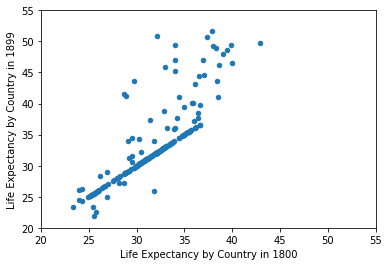

In [0]:
# Create the scatter plot
g1800s.plot(kind='scatter', x='1800', y='1899')

# Specify axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

# Display the plot
plt.show()

**Thinking about the question at hand**



*   Define a function called check_null_or_valid() that takes in one argument: row_data.

*   Inside the function, convert no_na to a numeric data type using pd.to_numeric().

*   Write an assert statement to make sure the first column (index 0) of the g1800s DataFrame is 'Life expectancy'.

*   Write an assert statement to test that all the values are valid for the g1800s DataFrame. Use the check_null_or_valid() function placed inside the .apply() method for this. Note that because you're applying it over the entire DataFrame, and not just one column, you'll have to chain the .all() method twice, and remember that you don't have to use () for functions placed inside .apply().
*   Write an assert statement to make sure that each country occurs only once in the data. Use the .value_counts() method on the 'Life expectancy' column for this. Specifically, index 0 of .value_counts() will contain the most frequently occuring value. If this is equal to 1 for the 'Life expectancy' column, then you can be certain that no country appears more than once in the data.



In [0]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[1:-1]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

In [0]:
# Check whether the first column is 'Life expectancy'
assert  g1800s.columns[0] == 'Life expectancy'

In [0]:
# Check whether the values in the row are valid
assert g1800s.iloc[:, 1:].apply(check_null_or_valid, axis=1).all().all()

In [0]:
# Check that there is only one instance of each country
assert g1800s['Life expectancy'].value_counts()[0] == 1

**Assembling your data**

Here, three DataFrames have been pre-loaded: g1800s, g1900s, and g2000s. These contain the Gapminder life expectancy data for, respectively, the 19th century, the 20th century, and the 21st century.

Your task in this exercise is to concatenate them into a single DataFrame called gapminder. This is a row-wise concatenation, similar to how you concatenated the monthly Uber datasets in Chapter 3.

In [0]:
g1800s.columns

Index(['Life expectancy', 'Unnamed: 0', '1800', '1801', '1802', '1803', '1804',
       '1805', '1806', '1807',
       ...
       '1890', '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898',
       '1899'],
      dtype='object', length=102)

In [0]:
g1900s = gapminder.iloc[:, 101:201]
g1900s.shape

(260, 100)

In [0]:
g1900s.columns

Index(['Life expectancy', '1900', '1901', '1902', '1903', '1904', '1905',
       '1906', '1907', '1908',
       ...
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999'],
      dtype='object', length=101)

In [0]:
g2000s = gapminder.iloc[:, 201:218]
g2000s.shape

(260, 17)

In [0]:
g2000s.columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [0]:
# match data
g1900s = pd.concat([life, g1900s], axis=1)
g1900s.shape # (260, 101)

(260, 101)

In [0]:
# match data
g2000s = pd.concat([life, g2000s], axis=1)
g2000s.shape # (260, 18)

(260, 18)



*   Use pd.concat() to concatenate g1800s, g1900s, and g2000s into one DataFrame called gapminder. Make sure you pass DataFrames to pd.concat() in the form of a list.



In [0]:
# Concatenate the DataFrames row-wise
gapminder = pd.concat([g1800s, g1900s, g2000s], axis=1)

In [0]:
# Print the shape of gapminder
print(gapminder.shape)

(260, 221)


In [0]:
# Print the head of gapminder
print(gapminder.head())

         Life expectancy  Unnamed: 0   1800   1801  ...  2013  2014  2015  2016
0               Abkhazia           0    NaN    NaN  ...   NaN   NaN   NaN   NaN
1            Afghanistan           1  28.21  28.20  ...   NaN   NaN   NaN   NaN
2  Akrotiri and Dhekelia           2    NaN    NaN  ...   NaN   NaN   NaN   NaN
3                Albania           3  35.40  35.40  ...   NaN   NaN   NaN   NaN
4                Algeria           4  28.82  28.82  ...   NaN   NaN   NaN   NaN

[5 rows x 221 columns]


In [0]:
# match data
del gapminder['Unnamed: 0']
gapminder.shape

(260, 220)

In [0]:
# remove duplicate columns
gapminder = gapminder.loc[:, ~gapminder.columns.duplicated()]

In [0]:
gapminder.shape

(260, 218)

#### Initial impressions of the data

**Reshaping your data**



*   Reshape gapminder by melting it. Keep 'Life expectancy' fixed by specifying it as an argument to the id_vars parameter.
*   Rename the three columns of the melted DataFrame to 'country', 'year', and 'life_expectancy' by passing them in as a list to gapminder_melt.columns.



In [0]:
import pandas as pd

In [0]:
# Melt gapminder: gapminder_melt
gapminder_melt = pd.melt(gapminder, id_vars='Life expectancy')

In [0]:
# Rename the columns
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

In [0]:
# Print the head of gapminder_melt
print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


**Checking the data types**

In [0]:
# Convert the year column to numeric
gapminder.year = pd.to_numeric(gapminder['year'])

KeyError: ignored

In [0]:
# Test if country is of type object
assert gapminder.country.dtypes == np.object

In [0]:
# Test if year is of type int64
assert gapminder.year.dtypes == np.int64

In [0]:
# Test if life_expectancy is of type float64
assert gapminder.life_expectancy.dtypes == np.float64

In [0]:
# Create the series of countries: countries
countries = gapminder['country']

In [0]:
# Drop all the duplicates from countries
countries = countries.drop_duplicates()

In [0]:
# Write the regular expression: pattern
pattern = '^[A-Za-z\.\s]*$'

In [0]:
# Create the Boolean vector: mask
mask = countries.str.contains(pattern)

In [0]:
# Invert the mask: mask_inverse
mask_inverse = ~mask


In [0]:
# Subset countries using mask_inverse: invalid_countries
invalid_countries = countries.loc[mask_inverse]

In [0]:
# Print invalid_countries
print(invalid_countries)

**More data cleaning and processing**

It's now time to deal with the missing data. There are several strategies for this: You can drop them, fill them in using the mean of the column or row that the missing value is in (also known as imputation), or, if you are dealing with time series data, use a forward fill or backward fill, in which you replace missing values in a column with the most recent known value in the column. 

In [0]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder.country).all()

In [0]:
# Assert that year does not contain any missing values
assert pd.notnull(gapminder.year).all()

In [0]:
# Drop the missing values
gapminder = gapminder.dropna(how='any')# Print the shape of gapminder
print(gapminder.shape)

**Wrapping up**

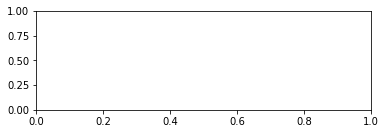

In [0]:
# Add first subplot
plt.subplot(2, 1, 1) 

In [0]:
# Create a histogram of life_expectancy
gapminder['life_expectancy'].plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder.groupby('year')['life_expectancy'].mean()

In [0]:
# Print the head of gapminder_agg
print(gapminder_agg.head())

# Print the tail of gapminder_agg
print(gapminder_agg.tail())

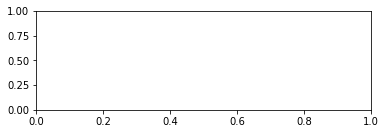

In [0]:
# Add second subplot
plt.subplot(2, 1, 2)

In [0]:
# Create a line plot of life expectancy per year
gapminder.life_expectancy.plot(kind='hist')
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

In [0]:
# Save both DataFrames to csv files
gapminder.to_csv('gapminder.csv' )
gapminder_agg.to_csv('gapminder_agg.csv') 